### 1.	Write the Python code to implement a single neuron.


In [1]:
# Python program to implement a
# single neuron neural network

# import all necessary libraries
from numpy import exp, array, random, dot, tanh

# Class to create a neural
# network with single neuron
class NeuralNetwork():
	
	def __init__(self):
		
		# Using seed to make sure it'll
		# generate same weights in every run
		random.seed(1)
		
		# 3x1 Weight matrix
		self.weight_matrix = 2 * random.random((3, 1)) - 1

	# tanh as activation function
	def tanh(self, x):
		return tanh(x)

	# derivative of tanh function.
	# Needed to calculate the gradients.
	def tanh_derivative(self, x):
		return 1.0 - tanh(x) ** 2

	# forward propagation
	def forward_propagation(self, inputs):
		return self.tanh(dot(inputs, self.weight_matrix))
	
	# training the neural network.
	def train(self, train_inputs, train_outputs,
							num_train_iterations):
								
		# Number of iterations we want to
		# perform for this set of input.
		for iteration in range(num_train_iterations):
			output = self.forward_propagation(train_inputs)

			# Calculate the error in the output.
			error = train_outputs - output

			# multiply the error by input and then
			# by gradient of tanh function to calculate
			# the adjustment needs to be made in weights
			adjustment = dot(train_inputs.T, error *
							self.tanh_derivative(output))
							
			# Adjust the weight matrix
			self.weight_matrix += adjustment

# Driver Code
if __name__ == "__main__":
	
	neural_network = NeuralNetwork()
	
	print ('Random weights at the start of training')
	print (neural_network.weight_matrix)

	train_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
	train_outputs = array([[0, 1, 1, 0]]).T

	neural_network.train(train_inputs, train_outputs, 10000)

	print ('New weights after training')
	print (neural_network.weight_matrix)

	# Test the neural network with a new situation.
	print ("Testing network on new examples ->")
	print (neural_network.forward_propagation(array([1, 0, 0])))


Random weights at the start of training
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New weights after training
[[5.39428067]
 [0.19482422]
 [0.34317086]]
Testing network on new examples ->
[0.99995873]


### 2.	Write the Python code to implement ReLU.


In [3]:
import numpy as np

x = np.random.random((3, 2)) - 0.5

x

array([[-0.00590765,  0.18932873],

       [-0.32396051,  0.25586596],

       [ 0.22358098,  0.02217555]])

np.maximum(x, 0)

array([[ 0.        , 0.18932873],

       [ 0.        , 0.25586596],

       [ 0.22358098,  0.02217555]])

x * (x > 0)

array([[-0.        , 0.18932873],

       [-0.        , 0.25586596],

       [ 0.22358098,  0.02217555]])

(abs(x) + x) / 2

array([[ 0.        , 0.18932873],

       [ 0.        , 0.25586596],

       [ 0.22358098,  0.02217555]])

array([[0.        , 0.18932873],
       [0.        , 0.25586596],
       [0.22358098, 0.02217555]])

In [4]:
import numpy as np

x = np.random.random((5000, 5000)) - 0.5

print("max method:")

%timeit -n10 np.maximum(x, 0)

print("multiplication method:")

%timeit -n10 x * (x > 0)

print("abs method:")

%timeit -n10 (abs(x) + x) / 2

max method:
573 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
multiplication method:
340 ms ± 7.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
abs method:
670 ms ± 49.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 3.	Write the Python code for a dense layer in terms of matrix multiplication.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
Y = np.array([0,1,1,0])

model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X, Y, epochs=100000, batch_size=4, verbose=0)

print (model.get_weights())
print (model.predict(X))

### 4.	Write the Python code for a dense layer in plain Python (that is, with list comprehensions and functionality built into Python).


In [ ]:
import numpy as np
    from keras.models import Sequential
    from keras.layers.core import Dense, Activation

    # X has shape (num_rows, num_cols), where the training data are stored
    # as row vectors
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

    # y must have an output vector for each input vector
    y = np.array([[0], [0], [0], [1]], dtype=np.float32)

    # Create the Sequential model
    model = Sequential()

    # 1st Layer - Add an input layer of 32 nodes with the same input shape as
    # the training samples in X
    model.add(Dense(32, input_dim=X.shape[1]))

    # Add a softmax activation layer
    model.add(Activation('softmax'))

    # 2nd Layer - Add a fully connected output layer
    model.add(Dense(1))

    # Add a sigmoid activation layer
    model.add(Activation('sigmoid'))

### 5.	What is the “hidden size” of a layer?


Hidden size is number of features of the hidden state for RNN. So if you increase hidden size then you compute bigger feature as hidden state output. However, num_layers is just multiple RNN units which contain hidden states with given hidden size.
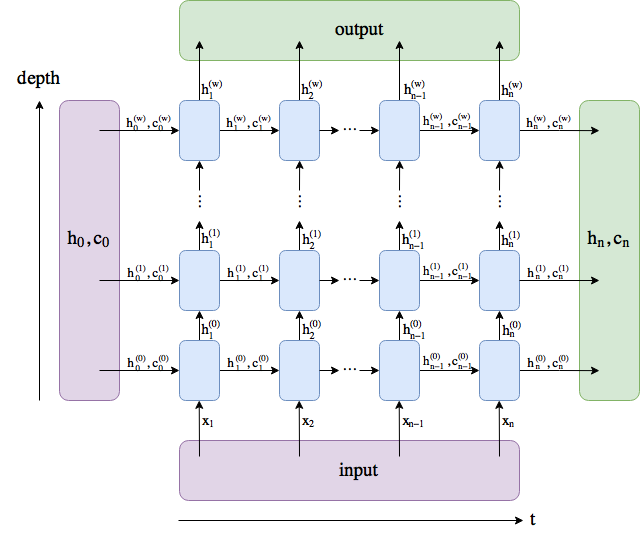

### 6.	What does the t method do in PyTorch?


torch.t(input) → Tensor

Expects input to be <= 2-D tensor and transposes dimensions 0 and 1.

0-D and 1-D tensors are returned as is. When input is a 2-D tensor this is equivalent to transpose(input, 0, 1).

Parameters

input (Tensor) – the input tensor.

### 7.	Why is matrix multiplication written in plain Python very slow?


Matrix multiplications in NumPy are reasonably fast without the need for optimization. However, if every second counts, it is possible to significantly improve performance (even without a GPU).

Below are a collection of small tricks that can help with large (~4000x4000) matrix multiplications. I have used them to reduce inference time in a deep neural network from 24 seconds to less than one second. In fact, in one case, my optimized code on a CPU turned out to run faster than Tensorflow using a GPU (1 second vs 7 seconds).

### 8.	In matmul, why is ac==br?


In [ ]:
def matmul2(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

So we just parse each position of C, using two FOR loops and enter the respective result at that position. If i,j represent row and col position in C, this looks something like..

### 9.	In Jupyter Notebook, how do you measure the time taken for a single cell to execute?


All you need to do now is put %%time at the top of the cell. %time measures how long it took something to run.

In [13]:
def f(x):

  return x * x

import timeit

timeit.repeat("for x in range(100): f(x)", "from __main__ import f", number=100000)

[3.4823679000000993,
 3.4840424000003622,
 3.631995200000347,
 3.5678391000001284,
 3.8011741999998776]

### 10.	What is elementwise arithmetic?


In mathematics, the Hadamard product (also known as the element-wise product, entrywise product: ch. 5  or Schur product) is a binary operation that takes two matrices of the same dimensions and produces another matrix of the same dimension as the operands, where each element i, j is the product of elements i, j of the original two matrices. It is to be distinguished from the more common matrix product. It is attributed to, and named after, either French mathematician Jacques Hadamard or German mathematician Issai Schur.

For two matrices A and B of the same dimension m × n, the Hadamard product {\displaystyle A\circ B}A\circ B (or {\displaystyle A\odot B}{\displaystyle A\odot B}) is a matrix of the same dimension as the operands, with elements given by


For matrices of different dimensions (m × n and p × q, where m ≠ p or n ≠ q), the Hadamard product is undefined.

### 11.	Write the PyTorch code to test whether every element of a is greater than the corresponding element of b.


In [ ]:
a = torch.randn(3, 2)
b = torch.ones(3, 2)
a
torch.where(a > 0, a, b)
a = torch.randn(2, 2, dtype=torch.double)
a
torch.where(a > 0, a, 0.)

### 12.	What is a rank-0 tensor? How do you convert it to a plain Python data type?


A tensor with rank 0 is a zero-dimensional array. The element of a zero-dimensional array is a point. This is represented as a Scalar in Math and has magnitude.

In [ ]:
import numpy as np
def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg

In [ ]:
# The following calls are equivalent.

value_1 = my_func(tf.constant([[1.0, 2.0], [3.0, 4.0]]))
print(value_1)



value_2 = my_func([[1.0, 2.0], [3.0, 4.0]])
print(value_2)



value_3 = my_func(np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32))
print(value_3)


### 13.	How does elementwise arithmetic help us speed up matmul?


I have been playing around with numba and numexpr trying to speed up a simple element-wise matrix multiplication. I have not been able to get better results, they both are basically (speedwise) equivalent to numpys multiply function. Has anyone had any luck in this area? Am I using numba and numexpr wrong (I'm quite new to this) or is this altogether a bad approach to try and speed this up. Here is a reproducible code, thank you in advanced:

In [ ]:
import numpy as np
from numba import autojit
import numexpr as ne

a=np.random.rand(10,5000000)

# numpy
multiplication1 = np.multiply(a,a)

# numba
def multiplix(X,Y):
    M = X.shape[0]
    N = X.shape[1]
    D = np.empty((M, N), dtype=np.float)
    for i in range(M):
        for j in range(N):
            D[i,j] = X[i, j] * Y[i, j]
    return D

mul = autojit(multiplix)
multiplication2 = mul(a,a)

# numexpr
def numexprmult(X,Y):
    M = X.shape[0]
    N = X.shape[1]
    return ne.evaluate("X * Y")

multiplication3 = numexprmult(a,a) 

* Why is speed important?

Matrix multiplication forms the basis of neural networks. Most operations while training a neural network require some form of matrix multiplication. Hence doing it well and doing it fast is really important.
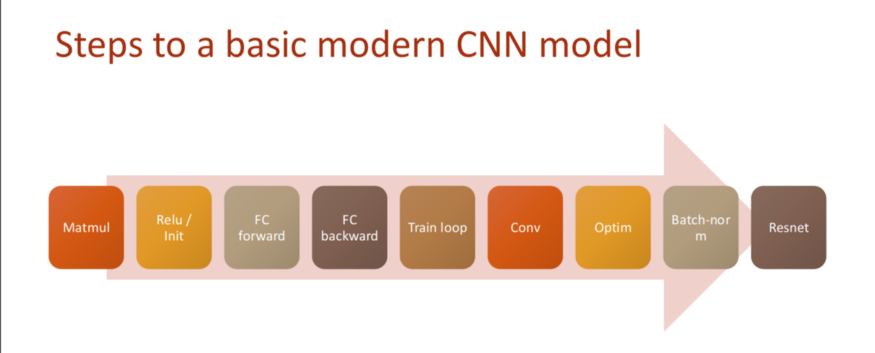
We will speed up our matrix multiplication by eliminating loops and replacing them with PyTorch functionalities. This will give us C speed (underneath PyTorch) instead of Python speed. Let’s see how that works.

### 14.	What are the broadcasting rules?


Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### 15.	What is expand_as? Show an example of how it can be used to match the results of broadcasting.


expand_as (other) → Tensor. Expand this tensor to the same size as other .

In [ ]:
a = torch.rand(2, 3)
b = torch.rand(4, 3)
c = b.expand_as(a)
print(c)

a = torch.rand(2, 3)
b = torch.rand(2, 4)
c = b.expand_as(a)
print(c)